In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
plt.style.use('ggplot')
import plotly.graph_objs as go
import plotly.express as px
import yfinance as yf

In [2]:
# Define the ticker symbol for FTSE 100
tickerSymbol = '^FTSE'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2010-1-1', end='2023-3-17')

# Print the first 5 rows of the data
print(tickerDf.head())


                                  Open         High          Low        Close  \
Date                                                                            
2010-01-04 00:00:00+00:00  5412.899902  5500.299805  5410.799805  5500.299805   
2010-01-05 00:00:00+00:00  5500.299805  5536.399902  5480.700195  5522.500000   
2010-01-06 00:00:00+00:00  5522.500000  5536.500000  5497.700195  5530.000000   
2010-01-07 00:00:00+00:00  5530.000000  5551.700195  5499.799805  5526.700195   
2010-01-08 00:00:00+00:00  5526.700195  5549.299805  5494.799805  5534.200195   

                               Volume  Dividends  Stock Splits  
Date                                                            
2010-01-04 00:00:00+00:00   750942000        0.0           0.0  
2010-01-05 00:00:00+00:00  1149301200        0.0           0.0  
2010-01-06 00:00:00+00:00   998295300        0.0           0.0  
2010-01-07 00:00:00+00:00  1162933700        0.0           0.0  
2010-01-08 00:00:00+00:00  1006420600     

Cleaning Data

In [3]:
# Clean the data
tickerDf.dropna(inplace=True)  # Remove rows with missing data
tickerDf = tickerDf.astype(float)  # Convert all columns to float data type

# Print the first 5 rows of the cleaned data
print(tickerDf.head())

                                  Open         High          Low        Close  \
Date                                                                            
2010-01-04 00:00:00+00:00  5412.899902  5500.299805  5410.799805  5500.299805   
2010-01-05 00:00:00+00:00  5500.299805  5536.399902  5480.700195  5522.500000   
2010-01-06 00:00:00+00:00  5522.500000  5536.500000  5497.700195  5530.000000   
2010-01-07 00:00:00+00:00  5530.000000  5551.700195  5499.799805  5526.700195   
2010-01-08 00:00:00+00:00  5526.700195  5549.299805  5494.799805  5534.200195   

                                 Volume  Dividends  Stock Splits  
Date                                                              
2010-01-04 00:00:00+00:00  7.509420e+08        0.0           0.0  
2010-01-05 00:00:00+00:00  1.149301e+09        0.0           0.0  
2010-01-06 00:00:00+00:00  9.982953e+08        0.0           0.0  
2010-01-07 00:00:00+00:00  1.162934e+09        0.0           0.0  
2010-01-08 00:00:00+00:00  1.0

In [5]:
# Create a line plot of the close price using Plotly
fig = go.Figure(data=[go.Candlestick(x=tickerDf.index,
                open=tickerDf['Open'],
                high=tickerDf['High'],
                low=tickerDf['Low'],
                close=tickerDf['Close'])])
fig.update_layout(title='FTSE 100 Candlestick Chart', xaxis_title='Date', yaxis_title='Price (GBP)')
fig.show()

## Descriptive Statistics

In [7]:
tickerDf.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3334.000000,3334.000000,3334.000000,3334.000000,3.334000e+03,3334.0,3334.0
mean,6616.318219,6656.376261,6575.402550,6616.898177,8.109339e+08,0.0,0.0
std,718.359387,713.423447,723.834080,718.185601,2.733261e+08,0.0,0.0
min,4805.799805,4863.399902,4790.000000,4805.799805,0.000000e+00,0.0,0.0
25%,5990.000000,6034.124878,5941.125122,5990.099976,6.535378e+08,0.0,0.0
50%,6721.250000,6753.299805,6681.449951,6721.399902,7.678566e+08,0.0,0.0
75%,7237.749878,7280.500000,7199.174805,7237.799805,9.031730e+08,0.0,0.0
max,8014.299805,8047.100098,7995.500000,8014.299805,3.761301e+09,0.0,0.0


In [6]:
# Calculate descriptive statistics
stats = tickerDf.describe().transpose()

# Add range column
stats['range'] = stats['max'] - stats['min']

# Rename columns
stats.rename(columns={'50%': 'median'}, inplace=True)

# Format the table
stats.index.name = 'column'
stats = stats[['count', 'mean', 'median', 'std', 'min', 'max', 'range']]
stats['mean'] = stats['mean'].map('{:.2f}'.format)
stats['median'] = stats['median'].map('{:.2f}'.format)
stats['std'] = stats['std'].map('{:.2f}'.format)
stats['min'] = stats['min'].map('{:.2f}'.format)
stats['max'] = stats['max'].map('{:.2f}'.format)
stats['range'] = stats['range'].map('{:.2f}'.format)

# Print the table
print(stats)

               count          mean        median           std      min  \
column                                                                    
Open          3334.0       6616.32       6721.25        718.36  4805.80   
High          3334.0       6656.38       6753.30        713.42  4863.40   
Low           3334.0       6575.40       6681.45        723.83  4790.00   
Close         3334.0       6616.90       6721.40        718.19  4805.80   
Volume        3334.0  810933929.27  767856550.00  273326081.90     0.00   
Dividends     3334.0          0.00          0.00          0.00     0.00   
Stock Splits  3334.0          0.00          0.00          0.00     0.00   

                        max          range  
column                                      
Open                8014.30        3208.50  
High                8047.10        3183.70  
Low                 7995.50        3205.50  
Close               8014.30        3208.50  
Volume        3761301300.00  3761301300.00  
Dividends

## Data Visualization

In [53]:
# Create a histogram of the daily closing prices
fig1 = px.histogram(tickerDf, x="Close", nbins=30, title="Histogram of FTSE 100 Closing Prices", 
                     width=800, height=600, barmode='group', opacity=0.9)
fig1.update_traces(marker_color='purple')
# Display the plot
fig1.show()

In [54]:
# Create a scatter plot of the daily opening prices vs. closing prices
fig2 = px.scatter(tickerDf, x="Open", y="Close", title="Scatter Plot of FTSE 100 Opening and Closing Prices", width=800, height=600)
fig2.update_traces(marker_color='purple')
# Display the plots
fig2.show()

In [51]:
# Create a box plot of the daily volume
fig3 = px.box(tickerDf, y="Volume", title="Box Plot of FTSE 100 Daily Volume", width=500, height=400)
fig3.update_traces(marker_color='purple')
# Display the plots
fig3.show()

## Correlation Analysis

In [55]:
new_df = tickerDf.iloc[:, :5]
corr_matrix = new_df.corr()

In [57]:
fig = px.imshow(corr_matrix, color_continuous_scale='RdBu_r')
fig.update_layout(title='Correlation Heatmap for FTSE 100 Data', width=500, height=400)
fig.show()

## Time Series Analysis

In [ ]:
# Slice the data to consider only until Volume
tickerDf = tickerDf.iloc[:, :5]

In [58]:
# Plot the time series data
fig1 = px.line(tickerDf, x=tickerDf.index, y='Close', title='FTSE 100 Closing Prices')
fig1.show()

In [62]:
# Decompose the time series into its components
decomposition = sm.tsa.seasonal_decompose(tickerDf['Close'], model='multiplicative', period=365)

In [66]:
# Plot the trend, seasonality, and residual components
fig2 = px.line(pd.concat([decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1),
               x=tickerDf.index, title='FTSE 100 Time Series Components')
fig2.show()

C:\Users\Edwar\AppData\Local\Temp\ipykernel_22820\1198275808.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



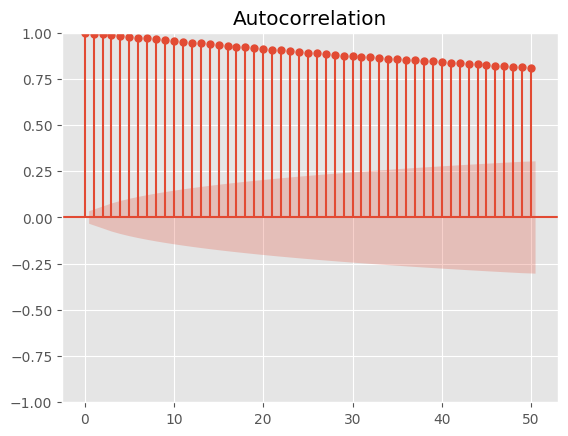

In [67]:
# Plot the autocorrelation function
fig3 = sm.graphics.tsa.plot_acf(tickerDf['Close'], lags=50)
fig3.show()

c:\Users\Edwar\Documents\DATA_SCIENCE_PROJECTS\LSE\London-Stock-Exchange\.venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

C:\Users\Edwar\AppData\Local\Temp\ipykernel_22820\1369261980.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



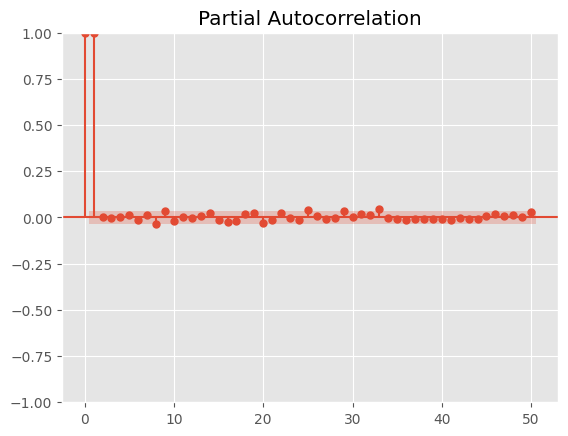

In [68]:
# Plot the partial autocorrelation function
fig4 = sm.graphics.tsa.plot_pacf(tickerDf['Close'], lags=50)
fig4.show()